In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
import numpy as np

In [50]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

train_images,test_images=train_images/255.0,test_images/255.0
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [20]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

Augment the dataset with modified pictures

In [52]:
for index, image in enumerate(train_images):
    reshaped_image=image.reshape((1,)+image.shape)
    augmented_image = datagen.flow(
    reshaped_image,
    batch_size=1
    ).next()[0]
    augmented_image = augmented_image.reshape((1,)+image.shape)
    train_images = np.concatenate((train_images, augmented_image), axis=0)
    train_labels=np.concatenate((train_labels, train_labels[index].reshape((1,)+train_labels[index].shape)), axis=0)
    

KeyboardInterrupt: 

[1]


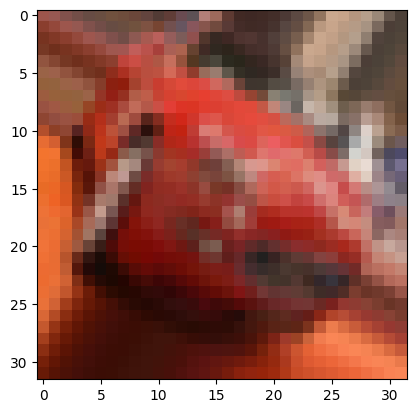

In [59]:
#print(type(train_images[0]))
#print(train_images.shape)
#print(train_labels.shape)
plt.imshow(train_images[50005], cmap=plt.cm.binary)
print(train_labels[50005])
plt.show()


Convolutional and Pooling layers of the network

In [60]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

Dense layers for calssification

In [62]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [65]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [66]:
train=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1615/1615 [==============================] - 25s 15ms/step - loss: 1.5262 - accuracy: 0.4426 - val_loss: 1.2334 - val_accuracy: 0.5660
Epoch 2/10
1615/1615 [==============================] - 24s 15ms/step - loss: 1.1676 - accuracy: 0.5865 - val_loss: 1.0760 - val_accuracy: 0.6081
Epoch 3/10
1615/1615 [==============================] - 25s 15ms/step - loss: 1.0262 - accuracy: 0.6390 - val_loss: 0.9881 - val_accuracy: 0.6520
Epoch 4/10
1615/1615 [==============================] - 25s 15ms/step - loss: 0.9278 - accuracy: 0.6728 - val_loss: 0.9673 - val_accuracy: 0.6649
Epoch 5/10
1615/1615 [==============================] - 25s 15ms/step - loss: 0.8584 - accuracy: 0.6994 - val_loss: 0.9392 - val_accuracy: 0.6757
Epoch 6/10
1615/1615 [==============================] - 25s 15ms/step - loss: 0.8046 - accuracy: 0.7186 - val_loss: 0.8675 - val_accuracy: 0.6969
Epoch 7/10
1615/1615 [==============================] - 25s 15ms/step - loss: 0.7553 - accuracy: 0.7344 - val_loss: 0.8972 -

In [68]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)


313/313 - 1s - loss: 0.8818 - accuracy: 0.7064 - 1s/epoch - 4ms/step
